# Thyroid Disease Detection Using Deep Learning

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Reading Data Set

In [2]:
dataset = pd.read_csv('hypothyroid.csv')

In [3]:
dataset

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [4]:
print(dataset.columns)

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')


In [5]:
dataset.shape

(3772, 30)

## Data Cleaning

## Dropping Unwanted Columns

In [6]:
column_to_drop = ['on thyroxine', 'query on thyroxine', 'query hypothyroid', 'query hyperthyroid', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'TBG', 'referral source']

dataset.drop(columns=column_to_drop, inplace=True)

dataset.columns

Index(['age', 'sex', 'on antithyroid medication', 'sick', 'pregnant',
       'thyroid surgery', 'I131 treatment', 'lithium', 'goitre', 'tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'binaryClass'],
      dtype='object')

## Removing '?' from Column Values

In [7]:
# Check columns with values '?'
print('The columns with "?":')
for i in dataset.columns:
    if('?' in dataset[i].values):
        print(i)

The columns with "?":
age
sex
TSH
T3
TT4
T4U
FTI


In [8]:
# Dropping rows with '?' for sex and age
print('Unique values of column "Sex": \n', dataset['sex'].unique())
print('\nUnique values of column "Age":\n', dataset['age'].unique())

dataset.drop(dataset[dataset['sex']=='?'].index, inplace=True)
dataset.drop(dataset[dataset['age']=='?'].index, inplace=True)

print()
print('Unique values of column "Sex": \n', dataset['sex'].unique())
print('\nUnique values of column "Age":\n', dataset['age'].unique())

Unique values of column "Sex": 
 ['F' 'M' '?']

Unique values of column "Age":
 ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']

Unique values of column "Sex": 
 ['F' 'M']

Unique values of column "Age":
 ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26' '58'
 '64' '44' '48' '61' '35' '83' '87' '53' '77' '27' '69' '74' '76' '36'
 '22' '43' '72' '82' '31' '39' '49' '62' '57' '50' '30' '29' '75' '19' '7'
 '79' '38' '17' '21' '24' '42' '15' '45' '32' '47' '1' '16' '52' '33' '13'
 '10' '89

In [9]:
dataset.shape

(3621, 16)

In [10]:
# Replacing '?' by NaN for simplifiaction purpose

to_remove_nan = np.array(['TSH', 'T3', 'TT4', 'T4U', 'FTI'])
for i in to_remove_nan :
    dataset[i].replace('?', np.NaN, inplace=True)   

In [11]:
# Convert the values of the above columns to float
for i in to_remove_nan:
    dataset[i] = dataset[i].astype('float64')

In [12]:
# Replacing NaN by the mean of the column
for i in to_remove_nan :
    mean = dataset[i].mean(skipna=True)
    dataset[i].replace(np.nan, mean, inplace=True)

In [13]:
dataset

,age,sex,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,binaryClass
0,41,F,f,f,f,f,f,f,f,f,1.300000,2.500000,125.000000,1.14000,109.000000,P
1,23,F,f,f,f,f,f,f,f,f,4.100000,2.000000,102.000000,0.99557,110.262009,P
2,46,M,f,f,f,f,f,f,f,f,0.980000,2.010828,109.000000,0.91000,120.000000,P
3,70,F,f,f,f,f,f,f,f,f,0.160000,1.900000,175.000000,0.99557,110.262009,P
4,70,F,f,f,f,f,f,f,f,f,0.720000,1.200000,61.000000,0.87000,70.000000,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,t,5.006132,2.010828,108.200881,0.99557,110.262009,P
3768,68,F,f,f,f,f,f,f,f,f,1.000000,2.100000,124.000000,1.08000,114.000000,P
3769,74,F,f,f,f,f,f,f,f,f,5.100000,1.800000,112.000000,1.07000,105.000000,P
3770,72,M,f,f,f,f,f,f,f,f,0.700000,2.000000,82.000000,0.94000,87.000000,P


## Data Transformation

In [14]:
# Replace binary data by binary values

# Positive - 1.0
# Negative - 0.0

dataset["binaryClass"] = dataset["binaryClass"].map({"P":1.0,"N":0.0})
dataset["binaryClass"].value_counts()

1.0    3341
0.0     280
Name: binaryClass, dtype: int64

In [15]:
# Replace boolean data by boolean values
dataset=dataset.replace({"t":1.0,"f":0.0})

In [16]:
# Replace gender by boolean values
dataset = dataset.replace({"F":0.0,"M":1.0})

In [17]:
dataset['age'] = dataset['age'].astype('float64')

# Data Normalisation Using Min-Max

In [18]:
# numeric_column = np.append(to_remove_nan,['age'])
# for i in numeric_column :
#     df_array = df[i].values.reshape(-1, 1)
#     df[i] = preprocessing.normalize(df_array,axis=0)

In [19]:
# scaler = preprocessing.StandardScaler()
# scaler.fit(dataset)
# dfs = scaler.transform(dataset)
# dataset = pd.DataFrame(dfs, columns=dataset.columns)

In [20]:
# NORMALISE DATA

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
for i in to_remove_nan :
    df_array = dataset[i].values.reshape(-1, 1)
    dataset[i] = scaler.fit_transform(df_array)

In [21]:
dataset

,age,sex,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,binaryClass
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002443,0.232227,0.287383,0.429952,0.272265,1.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007726,0.184834,0.233645,0.360179,0.275476,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001840,0.185860,0.250000,0.318841,0.300254,1.0
3,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000292,0.175355,0.404206,0.360179,0.275476,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001349,0.109005,0.137850,0.299517,0.173028,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.009436,0.185860,0.248133,0.360179,0.275476,1.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001877,0.194313,0.285047,0.400966,0.284987,1.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009613,0.165877,0.257009,0.396135,0.262087,1.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001311,0.184834,0.186916,0.333333,0.216285,1.0


## Data Visualisation

In [22]:
# Convert the target attribute's value count into a dataframe
dict1 = {'Value': ['0', '1'], 'Count': np.array([dataset['binaryClass'].value_counts()[0.0], dataset['binaryClass'].value_counts()[1.0]])}
binaryClass_df = pd.DataFrame(dict1)
binaryClass_df

,Value,Count
0,0,280
1,1,3341


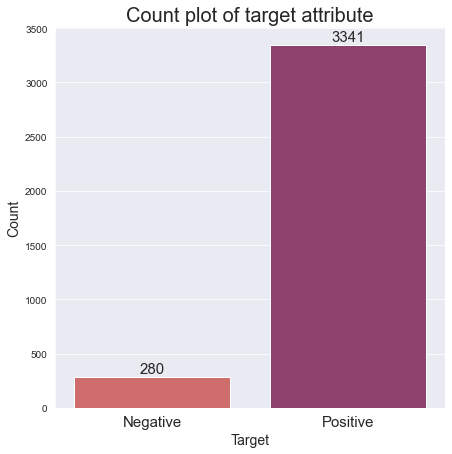

In [23]:
# Count plot of target values
value = ['Negative', 'Positive']
counts = [dataset['binaryClass'].value_counts()[0.0], dataset['binaryClass'].value_counts()[1.0]]
plt.figure(figsize=(7, 7))
plt.title('Count plot of target attribute', fontsize=20)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
binaryClass_plot = sns.barplot(x=value, y=counts, palette='flare')
for bar in binaryClass_plot.patches:
    binaryClass_plot.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('Target')
plt.xticks(size=15)
plt.show()

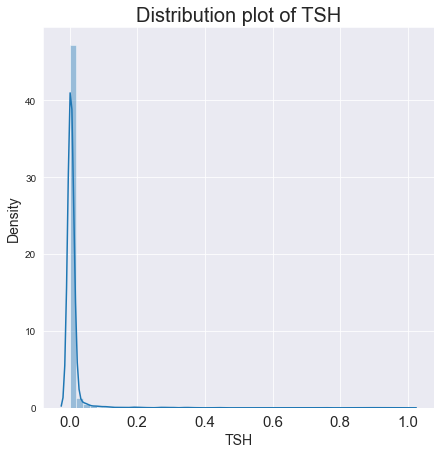

In [24]:
# Distribution of TSH
plt.figure(figsize=(7, 7))
plt.title('Distribution plot of TSH', fontsize=20)
plt.xlabel('TSH', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.distplot(dataset['TSH'])
plt.xticks(size=15)
plt.show()

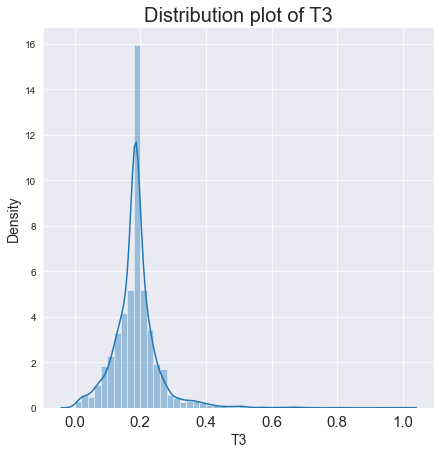

In [25]:
# Distribution of T3
plt.figure(figsize=(7, 7))
plt.title('Distribution plot of T3', fontsize=20)
plt.xlabel('T3', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.distplot(dataset['T3'])
plt.xticks(size=15)
plt.show()

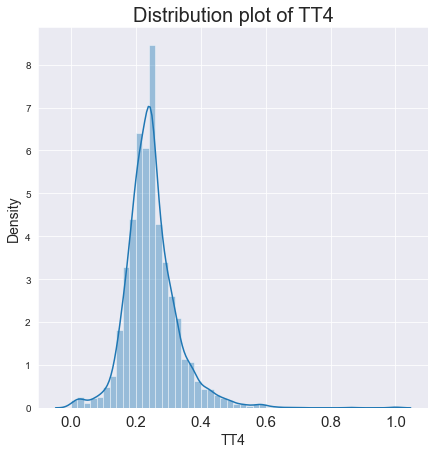

In [26]:
# Distribution of TT4
plt.figure(figsize=(7, 7))
plt.title('Distribution plot of TT4', fontsize=20)
plt.xlabel('TT4', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.distplot(dataset['TT4'])
plt.xticks(size=15)
plt.show()

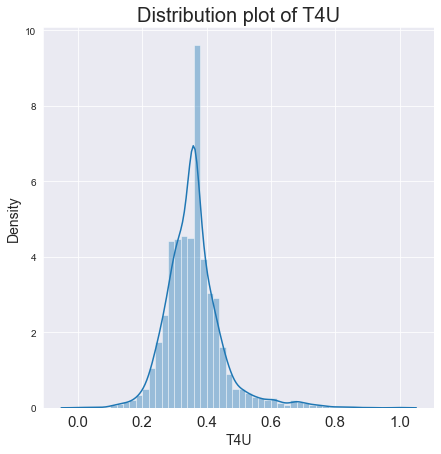

In [27]:
# Distribution of T4U
plt.figure(figsize=(7, 7))
plt.title('Distribution plot of T4U', fontsize=20)
plt.xlabel('T4U', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.distplot(dataset['T4U'])
plt.xticks(size=15)
plt.show()

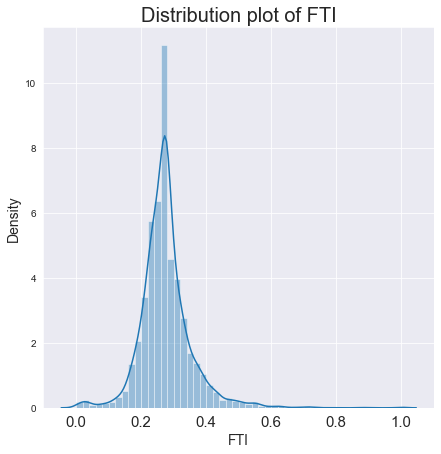

In [28]:
# Distribution of FTI
plt.figure(figsize=(7, 7))
plt.title('Distribution plot of FTI', fontsize=20)
plt.xlabel('FTI', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.distplot(dataset['FTI'])
plt.xticks(size=15)
plt.show()

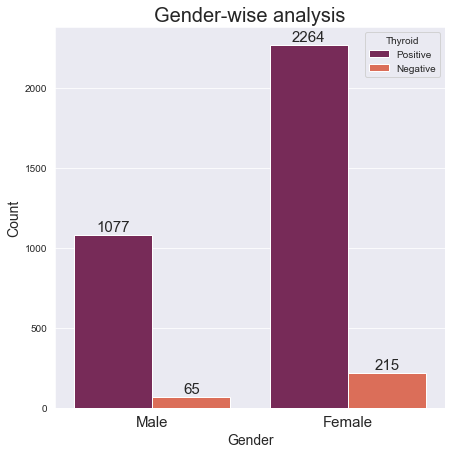

In [29]:
data=dataset[["sex","binaryClass"]]
mp = 0
mn = 0
fp = 0
fn = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["sex"]==1.0 and j["binaryClass"]==1.0:
        mp += 1
    if j["sex"]==1.0 and j["binaryClass"]==0.0:
        mn += 1
    if j["sex"]==0.0 and j["binaryClass"]==1.0:
        fp += 1
    if j["sex"]==0.0 and j["binaryClass"]==0.0:
        fn += 1
sex_binaryclass_df = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female'], 'count': [mp, fp, mn, fn], 'Thyroid': ['Positive', 'Positive','Negative',"Negative"]})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=sex_binaryclass_df['Gender'], y='count', hue='Thyroid', data=sex_binaryclass_df, palette='rocket')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Gender-wise analysis', fontsize=20)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(size=15)
plt.show()

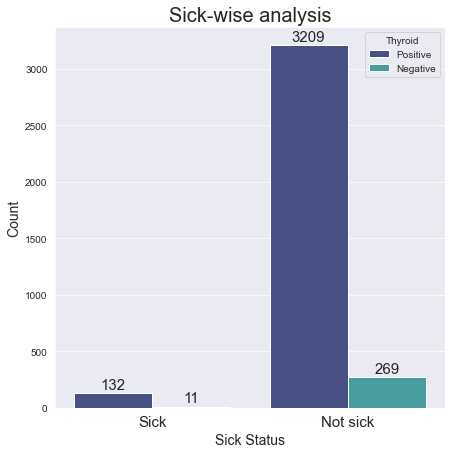

In [30]:
data=dataset[["sick","binaryClass"]]
sp = 0
sn = 0
nsp = 0
nsn = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["sick"]==1.0 and j["binaryClass"]==1.0:
        sp += 1
    if j["sick"]==1.0 and j["binaryClass"]==0.0:
        sn += 1
    if j["sick"]==0.0 and j["binaryClass"]==1.0:
        nsp += 1
    if j["sick"]==0.0 and j["binaryClass"]==0.0:
        nsn += 1
sick_binaryclass_df = pd.DataFrame({'Sick': ['Sick', 'Not sick', 'Sick', 'Not sick'], 'count': [sp, nsp, sn, nsn], 'Thyroid': ['Positive', 'Positive', 'Negative', 'Negative']})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=sick_binaryclass_df['Sick'], y='count', hue='Thyroid', data=sick_binaryclass_df, palette='mako')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Sick-wise analysis', fontsize=20)
plt.xlabel('Sick Status',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(size=15)
plt.show()

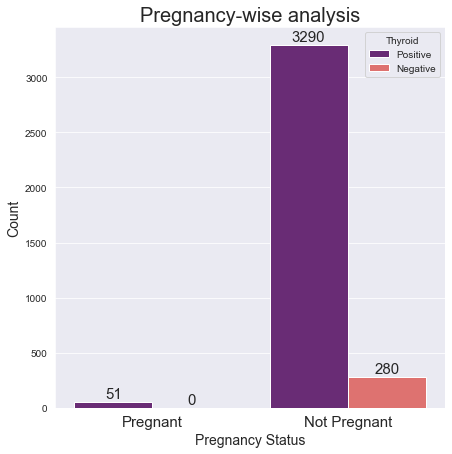

In [31]:
data=dataset[["pregnant","binaryClass"]]
pp = 0
pn = 0
npp = 0
npn = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["pregnant"]==1.0 and j["binaryClass"]==1.0:
        pp += 1
    if j["pregnant"]==1.0 and j["binaryClass"]==0.0:
        pn += 1
    if j["pregnant"]==0.0 and j["binaryClass"]==1.0:
        npp += 1
    if j["pregnant"]==0.0 and j["binaryClass"]==0.0:
        npn += 1
pregnant_binaryclass_df = pd.DataFrame({'Pregnant': ['Pregnant', 'Not Pregnant', 'Pregnant', 'Not Pregnant'], 'count': [pp, npp, pn, npn], 'Thyroid': ['Positive', 'Positive', 'Negative', 'Negative']})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=pregnant_binaryclass_df['Pregnant'], y='count', hue='Thyroid', data=pregnant_binaryclass_df, palette='magma')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Pregnancy-wise analysis', fontsize=20)
plt.xlabel('Pregnancy Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(size=15)
plt.show()

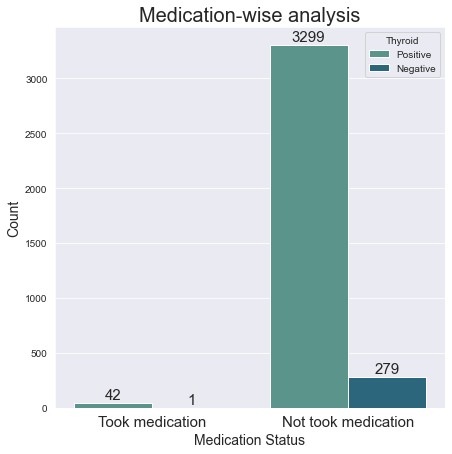

In [32]:
data=dataset[["on antithyroid medication","binaryClass"]]
oamp = 0
oamn = 0
noamp = 0
noamn = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["on antithyroid medication"]==1.0 and j["binaryClass"]==1.0:
        oamp += 1
    if j["on antithyroid medication"]==1.0 and j["binaryClass"]==0.0:
        oamn += 1
    if j["on antithyroid medication"]==0.0 and j["binaryClass"]==1.0:
        noamp += 1
    if j["on antithyroid medication"]==0.0 and j["binaryClass"]==0.0:
        noamn += 1
medication_binaryclass_df = pd.DataFrame({'Medication': ['Took medication', 'Not took medication', 'Took medication', 'Not took medication'], 'count': [oamp, noamp, oamn, noamn], 'Thyroid': ['Positive', 'Positive', 'Negative', 'Negative']})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=medication_binaryclass_df['Medication'], y='count', hue='Thyroid', data=medication_binaryclass_df, palette='crest')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Medication-wise analysis', fontsize=20)
plt.xlabel('Medication Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(size=15)
plt.show()

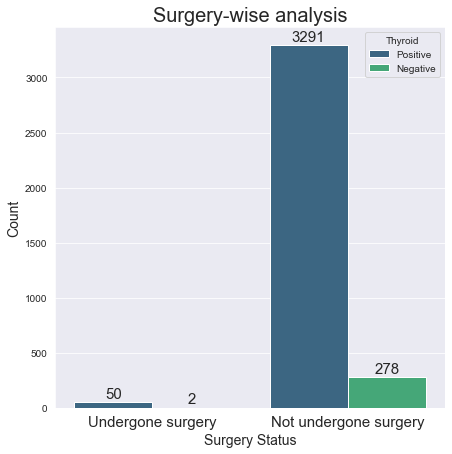

In [33]:
data=dataset[["thyroid surgery","binaryClass"]]
tsp = 0
tsn = 0
ntsp = 0
ntsn = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["thyroid surgery"]==1.0 and j["binaryClass"]==1.0:
        tsp += 1
    if j["thyroid surgery"]==1.0 and j["binaryClass"]==0.0:
        tsn += 1
    if j["thyroid surgery"]==0.0 and j["binaryClass"]==1.0:
        ntsp += 1
    if j["thyroid surgery"]==0.0 and j["binaryClass"]==0.0:
        ntsn += 1
surgery_binaryclass_df = pd.DataFrame({'Surgery': ['Undergone surgery', 'Not undergone surgery', 'Undergone surgery', 'Not undergone surgery'], 'count': [tsp, ntsp, tsn, ntsn], 'Thyroid': ['Positive', 'Positive', 'Negative', 'Negative']})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=surgery_binaryclass_df['Surgery'], y='count', hue='Thyroid', data=surgery_binaryclass_df, palette='viridis')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Surgery-wise analysis', fontsize=20)
plt.xlabel('Surgery Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(size=15)
plt.show()

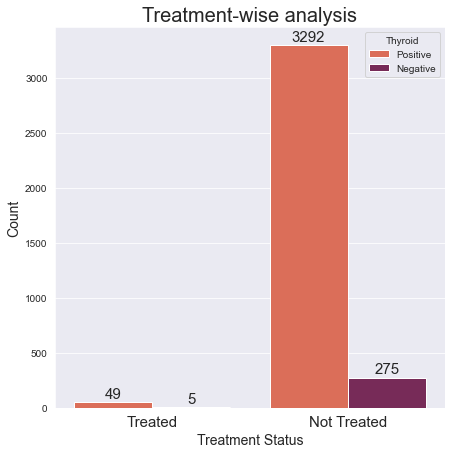

In [34]:
data=dataset[["I131 treatment","binaryClass"]]
i131p = 0
i131n = 0
ni131p = 0
ni131n = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["I131 treatment"]==1.0 and j["binaryClass"]==1.0:
        i131p += 1
    if j["I131 treatment"]==1.0 and j["binaryClass"]==0.0:
        i131n += 1
    if j["I131 treatment"]==0.0 and j["binaryClass"]==1.0:
        ni131p += 1
    if j["I131 treatment"]==0.0 and j["binaryClass"]==0.0:
        ni131n += 1
i131_binaryclass_df = pd.DataFrame({'Treatment': ['Treated', 'Not Treated', 'Treated', 'Not Treated'], 'count': [i131p, ni131p, i131n, ni131n], 'Thyroid': ['Positive', 'Positive', 'Negative', 'Negative']})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=i131_binaryclass_df['Treatment'], y='count', hue='Thyroid', data=i131_binaryclass_df, palette='rocket_r')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Treatment-wise analysis', fontsize=20)
plt.xlabel('Treatment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(size=15)
plt.show()

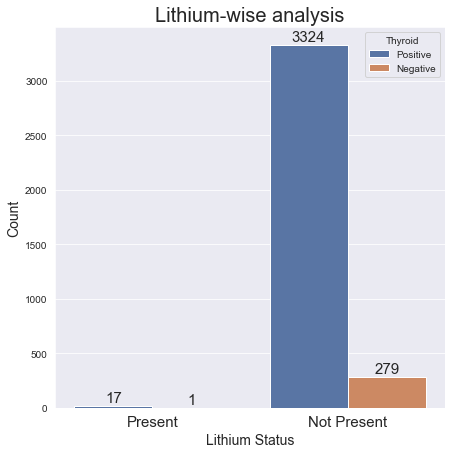

In [35]:
data=dataset[["lithium","binaryClass"]]
lp = 0
ln = 0
nlp = 0
nln = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["lithium"]==1.0 and j["binaryClass"]==1.0:
        lp += 1
    if j["lithium"]==1.0 and j["binaryClass"]==0.0:
        ln += 1
    if j["lithium"]==0.0 and j["binaryClass"]==1.0:
        nlp += 1
    if j["lithium"]==0.0 and j["binaryClass"]==0.0:
        nln += 1
lithium_binaryclass_df = pd.DataFrame({'Lithium': ['Present', 'Not Present', 'Present', 'Not Present'], 'count': [lp, nlp, ln, nln], 'Thyroid': ['Positive', 'Positive', 'Negative', 'Negative']})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=lithium_binaryclass_df['Lithium'], y='count', hue='Thyroid', data=lithium_binaryclass_df, palette='deep')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Lithium-wise analysis', fontsize=20)
plt.xlabel('Lithium Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(size=15)
plt.show()

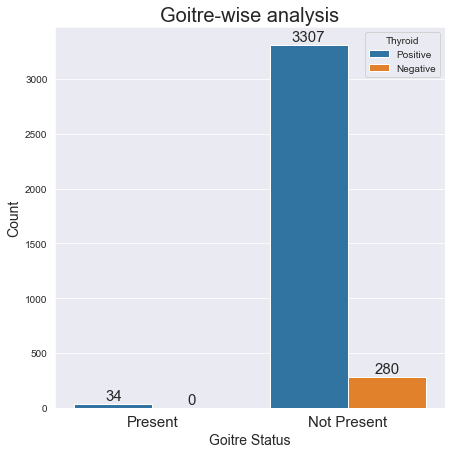

In [36]:
data=dataset[["goitre","binaryClass"]]
gp = 0
gn = 0
ngp = 0
ngn = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["goitre"]==1.0 and j["binaryClass"]==1.0:
        gp += 1
    if j["goitre"]==1.0 and j["binaryClass"]==0.0:
        gn += 1
    if j["goitre"]==0.0 and j["binaryClass"]==1.0:
        ngp += 1
    if j["goitre"]==0.0 and j["binaryClass"]==0.0:
        ngn += 1
goitre_binaryclass_df = pd.DataFrame({'Goitre': ['Present', 'Not Present', 'Present', 'Not Present'], 'count': [gp, ngp, gn, ngn], 'Thyroid': ['Positive', 'Positive', 'Negative', 'Negative']})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=goitre_binaryclass_df['Goitre'], y='count', hue='Thyroid', data=goitre_binaryclass_df, palette='tab10')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Goitre-wise analysis', fontsize=20)
plt.xlabel('Goitre Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(size=15)
plt.show()

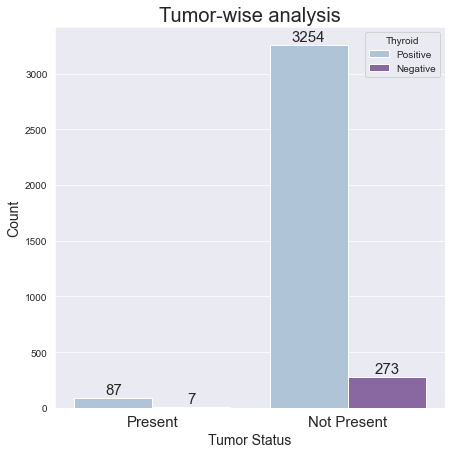

In [37]:
data=dataset[["tumor","binaryClass"]]
tp = 0
tn = 0
ntp = 0
ntn = 0
for i in range(0, len(data)):
    j = data.iloc[i]
    if j["tumor"]==1.0 and j["binaryClass"]==1.0:
        tp += 1
    if j["tumor"]==1.0 and j["binaryClass"]==0.0:
        tn += 1
    if j["tumor"]==0.0 and j["binaryClass"]==1.0:
        ntp += 1
    if j["tumor"]==0.0 and j["binaryClass"]==0.0:
        ntn += 1
tumor_binaryclass_df = pd.DataFrame({'Tumor': ['Present', 'Not Present', 'Present', 'Not Present'], 'count': [tp, ntp, tn, ntn], 'Thyroid': ['Positive', 'Positive', 'Negative', 'Negative']})

plt.figure(figsize=(7, 7))

plots=sns.barplot(x=tumor_binaryclass_df['Tumor'], y='count', hue='Thyroid', data=tumor_binaryclass_df, palette='BuPu')

for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.title('Tumor-wise analysis', fontsize=20)
plt.xlabel('Tumor Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(size=15)
plt.show()

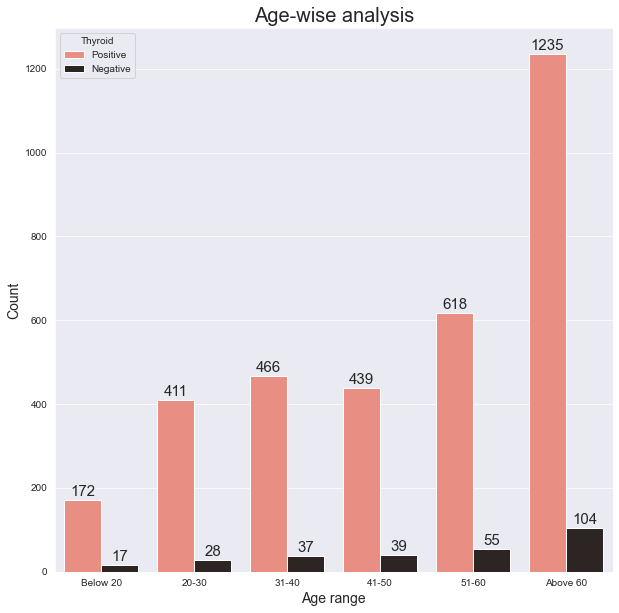

In [38]:
data=dataset[['age','binaryClass']]

lessThanTwenty_positive=0
lessThanTwenty_negative=0

twenty_Thirty_positive=0
twenty_Thirty_negative=0

thirtyOne_forty_positive=0
thirtyOne_forty_negative=0

fortyOne_Fifty_positive=0
fortyOne_Fifty_negative=0

fiftyOne_Sixty_positive=0
fiftyOne_Sixty_negative=0

Greaterthansixty_positive=0
Greaterthansixty_negative=0

for i in range(0,len(data)):
    j=data.iloc[i]
    if j["age"]>=0 and j["age"]<=20 and (j["binaryClass"]==1.0):
        lessThanTwenty_positive+=1
    if j["age"]>=0 and j["age"]<=20 and (j["binaryClass"]==0.0):
        lessThanTwenty_negative+=1
        
    if j["age"]>20 and j["age"]<=30 and (j["binaryClass"]==1.0):
        twenty_Thirty_positive+=1
    if j["age"]>20 and j["age"]<=30 and (j["binaryClass"]==0.0):
        twenty_Thirty_negative+=1
        
    if j["age"]>30 and j["age"]<=40 and (j["binaryClass"]==1.0):
        thirtyOne_forty_positive+=1
    if j["age"]>30 and j["age"]<=40 and (j["binaryClass"]==0.0):
        thirtyOne_forty_negative+=1
        
    if j["age"]>40 and j["age"]<=50 and (j["binaryClass"]==1.0):
        fortyOne_Fifty_positive+=1
    if j["age"]>40 and j["age"]<=50 and (j["binaryClass"]==0.0):
        fortyOne_Fifty_negative+=1
        
    if j["age"]>50 and j["age"]<=60 and (j["binaryClass"]==1.0):
        fiftyOne_Sixty_positive+=1
    if j["age"]>50 and j["age"]<=60 and (j["binaryClass"]==0.0):
        fiftyOne_Sixty_negative+=1
        
    if j["age"]>60 and (j["binaryClass"]==1.0):
        Greaterthansixty_positive+=1
    if j["age"]>60 and (j["binaryClass"]==0.0):
        Greaterthansixty_negative+=1
        
age_binaryclass_df = pd.DataFrame(
    {'Range': ['Below 20', 'Below 20', '20-30', '20-30', '31-40', '31-40', '41-50', '41-50', '51-60', '51-60', 'Above 60', 'Above 60'], 
     'count': [lessThanTwenty_positive, lessThanTwenty_negative, twenty_Thirty_positive, twenty_Thirty_negative, 
               thirtyOne_forty_positive, thirtyOne_forty_negative, fortyOne_Fifty_positive, fortyOne_Fifty_negative, 
               fiftyOne_Sixty_positive, fiftyOne_Sixty_negative, Greaterthansixty_positive, Greaterthansixty_negative],
     'Thyroid': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative']})

plt.figure(figsize=(10, 10))
 
plots = sns.barplot(x=age_binaryclass_df["Range"], y="count", hue='Thyroid', data=age_binaryclass_df, palette='dark:salmon_r')
 
for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
    
plt.title("Age-wise analysis",fontsize=20)
plt.xlabel("Age range", size=14)
plt.ylabel("Count", size=14)
plt.show()

In [39]:
dataset.corr()

,age,sex,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,binaryClass
age,1.000000,-0.003680,-0.065746,0.081011,-0.117561,-0.027923,0.048610,-0.031099,-0.053383,-0.022472,-0.044993,-0.220507,-0.037551,-0.157680,0.050455,-0.000503
sex,-0.003680,1.000000,-0.030513,0.005799,-0.081123,-0.036966,-0.019764,-0.014171,0.007869,-0.077166,-0.033712,-0.064025,-0.170178,-0.230400,-0.039254,0.051859
on antithyroid medication,-0.065746,-0.030513,1.000000,-0.022229,0.073437,-0.013233,0.007546,-0.007749,-0.010673,-0.017897,-0.010951,0.081133,0.024620,0.061333,-0.016460,0.022192
sick,0.081011,0.005799,-0.022229,1.000000,-0.024236,-0.000639,-0.024949,-0.014332,-0.019741,0.011483,-0.022383,-0.075923,-0.034624,-0.037364,-0.019310,0.000306
pregnant,-0.117561,-0.081123,0.073437,-0.024236,1.000000,-0.014427,-0.014706,-0.008448,0.012663,0.113131,-0.020307,0.182448,0.175356,0.337917,-0.015126,0.034601
thyroid surgery,-0.027923,-0.036966,-0.013233,-0.000639,-0.014427,1.000000,0.004300,-0.008532,-0.011752,-0.005108,0.028917,-0.026396,-0.029012,0.018961,-0.033046,0.017563
I131 treatment,0.048610,-0.019764,0.007546,-0.024949,-0.014706,0.004300,1.000000,-0.008697,-0.011979,-0.020087,-0.001916,0.010626,-0.011211,0.011570,-0.021399,-0.007032
lithium,-0.031099,-0.014171,-0.007749,-0.014332,-0.008448,-0.008532,-0.008697,1.000000,-0.006881,-0.011539,-0.006904,0.008230,-0.013948,0.015262,-0.026178,0.005761
goitre,-0.053383,0.007869,-0.010673,-0.019741,0.012663,-0.011752,-0.011979,-0.006881,1.000000,0.002114,-0.011800,0.012255,-0.019014,0.035523,-0.040356,0.028185
tumor,-0.022472,-0.077166,-0.017897,0.011483,0.113131,-0.005108,-0.020087,-0.011539,0.002114,1.000000,-0.014169,0.097425,0.058447,0.088010,0.014049,0.001747


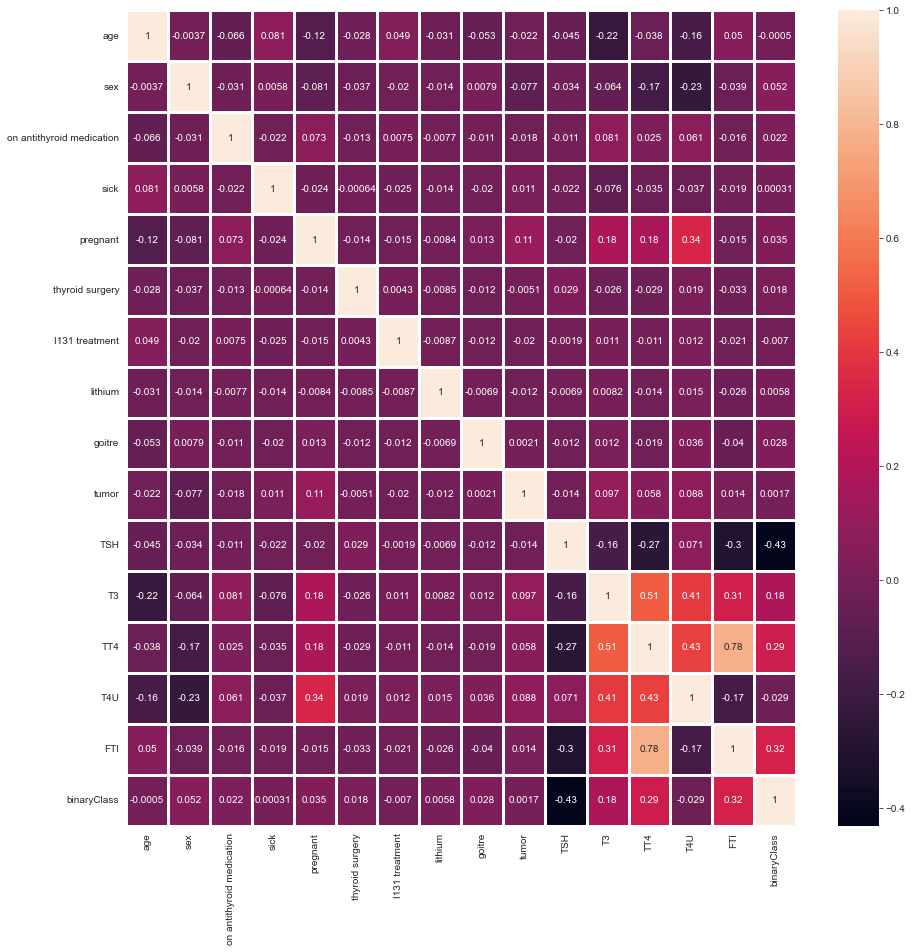

In [40]:
# Heatmap plot of the transformed dataset
plt.figure(figsize=(15, 15))
sns.heatmap(dataset.corr(), linewidths=3, annot=True)
plt.show()

## Change dimensions to 3D

In [41]:
x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, y = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

In [42]:
for i in range(0, dataset.shape[0]-48) :
    x0.append(dataset.iloc[i:i+48,0])
    x1.append(dataset.iloc[i:i+48,1])
    x2.append(dataset.iloc[i:i+48,2])
    x3.append(dataset.iloc[i:i+48,3])
    x4.append(dataset.iloc[i:i+48,4])
    x5.append(dataset.iloc[i:i+48,5])
    x6.append(dataset.iloc[i:i+48,6])
    x7.append(dataset.iloc[i:i+48,7])
    x8.append(dataset.iloc[i:i+48,8])
    x9.append(dataset.iloc[i:i+48,9])
    x10.append(dataset.iloc[i:i+48,10])
    x11.append(dataset.iloc[i:i+48,11])
    x12.append(dataset.iloc[i:i+48,12])
    x13.append(dataset.iloc[i:i+48,13])
    x14.append(dataset.iloc[i:i+48,14])
    x15.append(dataset.iloc[i:i+48,15])
    y.append(dataset.iloc[i+48,15])

In [43]:
x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, y = np.array(x0), np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6), np.array(x7), np.array(x8), np.array(x9), np.array(x10), np.array(x11),np.array(x12), np.array(x13),np.array(x14), np.array(x15), np.array(y)

In [44]:
x = np.stack([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15], axis=2)

In [45]:
x.shape

(3573, 48, 16)

In [46]:
y.shape

(3573,)

In [47]:
y = np.reshape(y, (len(y),1))
y.shape

(3573, 1)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [49]:
len(X_train), len(Y_train), len(X_test), len(Y_test),

(2501, 2501, 1072, 1072)

## Importing TensorFlow

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Simple LSTM (Long Short Term Memory)

In [51]:
# Creating model1
model1 = keras.Sequential()

# Applying Layers to the model1
model1.add(keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
model1.add(layers.LSTM(16, return_sequences = False, activation = 'tanh'))
# model1.add(layers.Dropout(0.6))
model1.add(layers.Dense(1))

# Compile the model1
model1.compile(loss = keras.losses.BinaryCrossentropy(from_logits = True),
               optimizer = keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ["accuracy"])

In [52]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 2,129
Trainable params: 2,129
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Training the Model
history1 = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=2)

Epoch 1/2
157/157 [==============================] - 8s 50ms/step - loss: 0.3604 - accuracy: 0.8061 - val_loss: 0.2744 - val_accuracy: 0.9216
Epoch 2/2
157/157 [==============================] - 5s 32ms/step - loss: 0.2729 - accuracy: 0.9224 - val_loss: 0.2748 - val_accuracy: 0.9216


In [54]:
# Evaluating the Model
score1 = model1.evaluate(X_test, Y_test)
accuracy1 = score1[1]*100
print("Accuracy: %.2f%%" % accuracy1)

34/34 [==============================] - 0s 8ms/step - loss: 0.2748 - accuracy: 0.9216
Accuracy: 92.16%


In [55]:
# Get the predictions
predict1 = model1.predict_classes(X_test)
predict1.shape

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(1072, 1)

In [56]:
# Print the predictions
df1 = pd.DataFrame(list(zip(Y_test.astype('int64').reshape(-1), predict1.reshape(-1))),columns=["Actual", "Predicted"])
df1.style.hide_index()

Actual,Predicted
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1


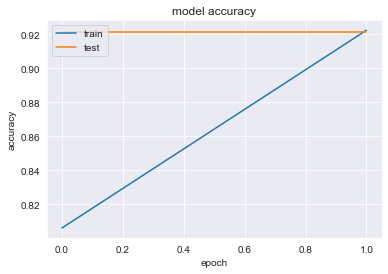

In [57]:
# summarize history for accuracy


plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

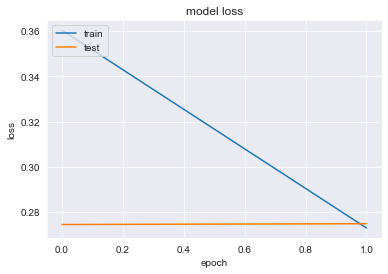

In [58]:
# summarize history for loss


plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
rmse1 = np.sqrt(mean_squared_error(Y_test, predict1))
print('Simple LSTM Test RMSE: %.3f' % rmse1)

Simple LSTM Test RMSE: 0.280


In [60]:
print(classification_report(Y_test, predict1))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        84
         1.0       0.92      1.00      0.96       988

    accuracy                           0.92      1072
   macro avg       0.46      0.50      0.48      1072
weighted avg       0.85      0.92      0.88      1072



## Stacked LSTM

In [61]:
# Creating model3
model3 = keras.Sequential()

# Applying Layers to the model3
model3.add(keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
model3.add(layers.LSTM(16, return_sequences=True, activation='tanh'))
model3.add(layers.Dropout(0.4))
model3.add(layers.LSTM(8, return_sequences=False, activation='tanh'))
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(1))

# Compile the model3
model3.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
               optimizer=keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

In [62]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 48, 16)            2112      
_________________________________________________________________
dropout (Dropout)            (None, 48, 16)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 2,921
Trainable params: 2,921
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Training the Model
history3=model3.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=2)

Epoch 1/2
157/157 [==============================] - 12s 76ms/step - loss: 0.3270 - accuracy: 0.8764 - val_loss: 0.2750 - val_accuracy: 0.9216
Epoch 2/2
157/157 [==============================] - 10s 63ms/step - loss: 0.2958 - accuracy: 0.9164 - val_loss: 0.2763 - val_accuracy: 0.9216


In [64]:
# Evaluating the Model
score3 = model3.evaluate(X_test, Y_test)
accuracy3 = score3[1]*100
print("Accuracy: %.2f%%" % accuracy3)

34/34 [==============================] - 0s 13ms/step - loss: 0.2763 - accuracy: 0.9216
Accuracy: 92.16%


In [65]:
# Get the predictions
predict3 = model3.predict_classes(X_test)

In [66]:
# Print the predictions
df3 = pd.DataFrame(list(zip(Y_test.astype('int64').reshape(-1), predict3.reshape(-1))),columns=["Actual", "Predicted"])
df3.style.hide_index()

Actual,Predicted
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1


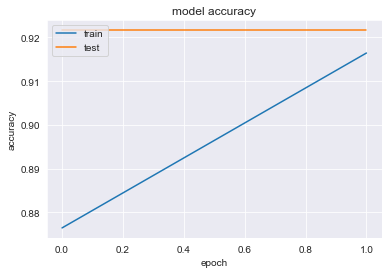

In [67]:
# summarize history for accuracy


plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

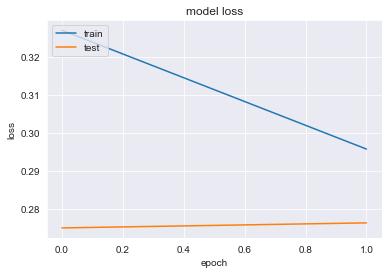

In [68]:
# summarize history for loss


plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
rmse3 = np.sqrt(mean_squared_error(Y_test, predict3))
print('Stacked LSTM Test RMSE: %.3f' % rmse3)

Stacked LSTM Test RMSE: 0.280


In [70]:
print(classification_report(Y_test, predict3))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        84
         1.0       0.92      1.00      0.96       988

    accuracy                           0.92      1072
   macro avg       0.46      0.50      0.48      1072
weighted avg       0.85      0.92      0.88      1072



## Bidirectional LSTM

In [71]:
# Creating model2
model2 = keras.Sequential()

# Applying Layers to the model2
model2.add(keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
model2.add(layers.Bidirectional(layers.LSTM(16, return_sequences = True, activation = 'tanh')))
model2.add(layers.Dropout(0.4))
model2.add(layers.Bidirectional(layers.LSTM(8, return_sequences = False, activation = 'tanh')))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(1))

# Compile the model2
model2.compile(loss = keras.losses.BinaryCrossentropy(from_logits = True),
               optimizer = keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ["accuracy"])

In [72]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 48, 32)            4224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 32)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16)                2624      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 6,865
Trainable params: 6,865
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Training the Model
history2=model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=2)

Epoch 1/2
157/157 [==============================] - 13s 85ms/step - loss: 0.3314 - accuracy: 0.8529 - val_loss: 0.2798 - val_accuracy: 0.9216
Epoch 2/2
157/157 [==============================] - 10s 63ms/step - loss: 0.2819 - accuracy: 0.9220 - val_loss: 0.2760 - val_accuracy: 0.9216


In [74]:
# Evaluating the Model
score2 = model2.evaluate(X_test, Y_test)
accuracy2 = score2[1]*100
print("Accuracy: %.2f%%" % accuracy2)

34/34 [==============================] - 0s 14ms/step - loss: 0.2760 - accuracy: 0.9216
Accuracy: 92.16%


In [75]:
# Get the predictions
predict2 = model2.predict_classes(X_test)

In [76]:
# Print the predictions
df2 = pd.DataFrame(list(zip(Y_test.astype('int64').reshape(-1), predict2.reshape(-1))),columns=["Actual", "Predicted"])
df2.style.hide_index()

Actual,Predicted
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1


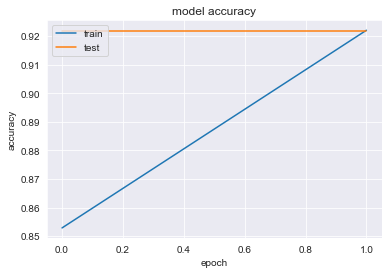

In [77]:
# summarize history for accuracy


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

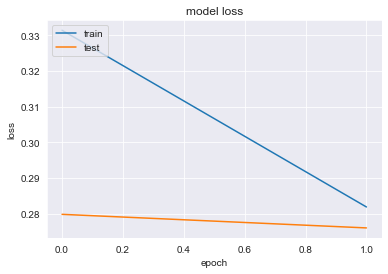

In [78]:
# summarize history for loss


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
rmse2 = np.sqrt(mean_squared_error(Y_test, predict2))
print('Bidirectional LSTM Test RMSE: %.3f' % rmse2)

Bidirectional LSTM Test RMSE: 0.280


In [80]:
print(classification_report(Y_test, predict2))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        84
         1.0       0.92      1.00      0.96       988

    accuracy                           0.92      1072
   macro avg       0.46      0.50      0.48      1072
weighted avg       0.85      0.92      0.88      1072



## GRU (Gated Recurrent Unit)

In [81]:
# Creating Model

model4 = keras.Sequential()

# Applying Layers to the Model

model4.add(keras.Input(shape=(X_train.shape[1], X_train.shape[2])))
model4.add(layers.GRU(16, return_sequences=False, activation='tanh'))
model4.add(layers.Dropout(0.4))
model4.add(layers.Dense(1))

# Compile the Model

model4.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]

)

In [82]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 16)                1632      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,649
Trainable params: 1,649
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Training the Model
history4=model4.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=2)

Epoch 1/2
157/157 [==============================] - 7s 42ms/step - loss: 0.3146 - accuracy: 0.9104 - val_loss: 0.2758 - val_accuracy: 0.9216
Epoch 2/2
157/157 [==============================] - 6s 36ms/step - loss: 0.2930 - accuracy: 0.9172 - val_loss: 0.2751 - val_accuracy: 0.9216


In [84]:
# Evaluating the Model
score4 = model4.evaluate(X_test, Y_test)
accuracy4 = score4[1]*100
print("Accuracy: %.2f%%" % accuracy4)

34/34 [==============================] - 0s 7ms/step - loss: 0.2751 - accuracy: 0.9216
Accuracy: 92.16%


In [85]:
# Get the predictions
predict4 = model4.predict_classes(X_test)

In [86]:
# Print the predictions
df4 = pd.DataFrame(list(zip(Y_test.astype('int64').reshape(-1), predict4.reshape(-1))),columns=["Actual", "Predicted"])
df4.style.hide_index()

Actual,Predicted
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1


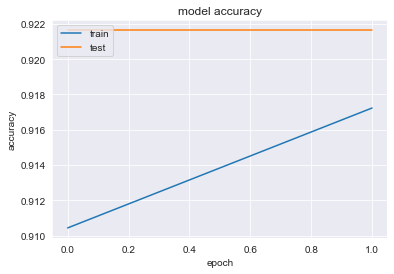

In [87]:
# summarize history for accuracy


plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

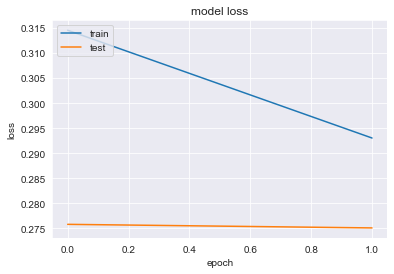

In [88]:
# summarize history for loss


plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
rmse4 = np.sqrt(mean_squared_error(Y_test, predict4))
print('GRU Test RMSE: %.3f' % rmse4)

GRU Test RMSE: 0.280


In [90]:
print(classification_report(Y_test, predict4))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        84
         1.0       0.92      1.00      0.96       988

    accuracy                           0.92      1072
   macro avg       0.46      0.50      0.48      1072
weighted avg       0.85      0.92      0.88      1072

